# Perbandingan Tinggi dan Berat Badan dengan Linear Regression

<h3>NAMA : Muhammad Hafis<h3>
NIM  : 09011381823092

    Linear Regression adalah Metode Statistik yang berfungsi untuk menguji sejauh mana hubungan sebab akibat antara Variabel Faktor Penyebab (X) terhadap Variabel Akibatnya. Faktor Penyebab pada umumnya dilambangkan dengan X atau disebut juga dengan Predictor sedangkan Variabel Akibat dilambangkan dengan Y atau disebut juga dengan Response.

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Import yang dilakukan diatas merupakan merupakan library-library yang digunakan :
1. pandas : Sebuah library untuk analisis data dan struktur data
2. numpy : Library untuk dimensionala array operasi matrix atau vector
3. matplotlib : Untuk menampilkan sebuah gambar atau grafik plot

Dataset yang di pakai merupakan dataset yang di ambil dari : https://www.kaggle.com/yersever/500-person-gender-height-weight-bodymassindex (500_Person_Gender_Height_Weight_Index.csv)

In [2]:
body = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')

Menampilkan data 5 baris teratas dari dataset.

In [3]:
body.head(5)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [4]:
body.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [5]:
body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


<h4>Describe : guna untuk mengecek statistik data dari dataset seperti rata-rata, median dll pada kolom.<h4>
Info : untuk melakukan pengecekan nomor index dan tipe data pada dataset.

# Visualisasi & Analisis Data

<h3>Seaborn : Merupakan library untuk memvisualisasikan data, seaborn juga memiliki banyak fungsi visualisasi data.

In [6]:
import seaborn as sns

<h4> Visualisasi data untuk Tinggi Badan.

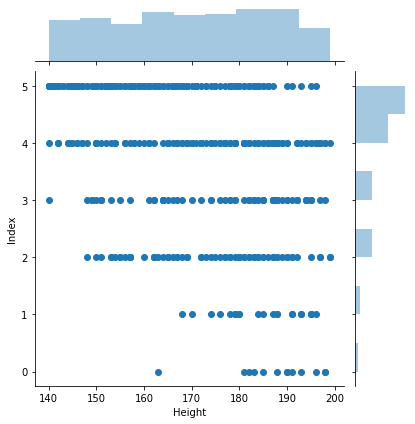

In [7]:
sns.jointplot(body['Height' ],body['Index'])

<h4> Visualisasi data untuk Berat Badan.

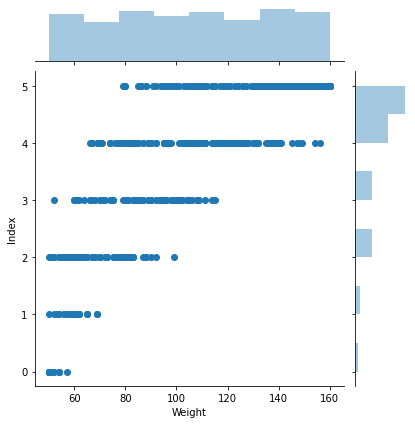

In [8]:
sns.jointplot(body['Weight' ],body['Index'])

<h3>Melihat hubungan antara semua data pada Dataset.

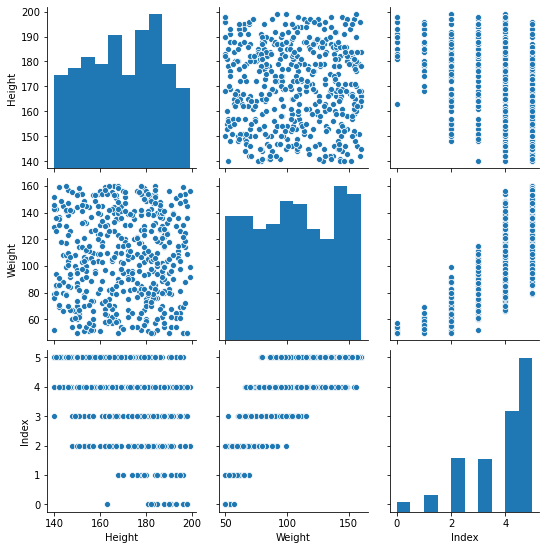

In [9]:
sns.pairplot(body)

Melakukan perbandingan menggunakan lmplot antara kolom Height dan kolom Weight

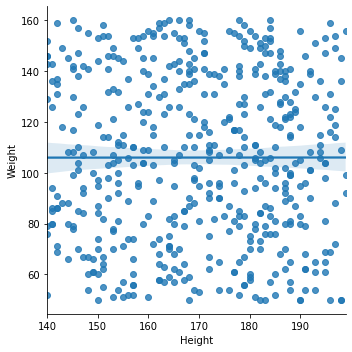

In [10]:
sns.lmplot(x='Height',y ='Weight', data=body)

# Training Data and Testing Data

    Setelah melakukan pengecekan pada data set setelah itu kita pisahkan data menjadi 2 yaitu Train data dan Test data untuk melakukan sebuah pengujian, dalam melakukan Training dan Testing sebuah data, Training digunakan untuk melatih algoritma sedangkan testing untuk melihat performa algoritma yang sudah dilatih sebelumnya.

In [11]:
y = body['Index']

In [12]:
X = body[['Height', 'Weight']]

Untuk variabel y diisi dengan kolom Index pada data, sedangkan untuk variabel X diisi dengan kolom Height dan Weight pada data.

In [13]:
from sklearn.model_selection import train_test_split

Dengan menggunakan Model Selection utnuk melakukan splitting data, dengan penetapan Test data yang dipakai yaitu 0.2 atau 20% dari data menyeluruh sedangkan untuk Train data 80% untuk sisa data yang diambil, dan random state 5.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [15]:
# Check dimensi array dari massing masing variable
print('X_train = ', X_train.shape)
print('X_test = ', X_test.shape)
print('y_train = ', y_train.shape)
print('y_test = ', y_test.shape)

X_train =  (400, 2)
X_test =  (100, 2)
y_train =  (400,)
y_test =  (100,)


Total Data 500, 20% yang diambil untuk test data berarti 500-20% = 100 data yang dipakai untuk Test Data.

In [16]:
X_train.head()

,Height,Weight
247,142,159
390,167,58
186,167,135
484,188,115
139,159,124


In [17]:
y_train.head()

247    5
390    2
186    5
484    4
139    5
Name: Index, dtype: int64

# Training Model

Metode yang Digunakan Linear Regression untuk melakukan pengujian terhadap data train, menggunakan Import LinearRegression dari sknlearn.linear_model terhadap variabel X dan y.

In [18]:
from sklearn.linear_model import LinearRegression

Membuat variabel untuk LinearRegression() dengan nama lm.

In [19]:
lm = LinearRegression()

Melakukan train data lm dengan melakukan fit data pada X_train dan y_train.

In [20]:
lm.fit(X_train,y_train)

LinearRegression()

Melakukan Print Out data hasil koefesien dari hasil train data sebelumnya.

In [21]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-0.03411072  0.03334752]


# Predicting Test Data

Setelah melakukan train fit data sekarang mengevaluasi sebuah data dengan data prediksi.

In [22]:
predictions = lm.predict(X_test)

Dengan lm.predict() dengan menggunakan data dari X_test. Serta melakukan Plotting untuk melihat data hasil predict.

Text(0, 0.5, 'Predicted Y')

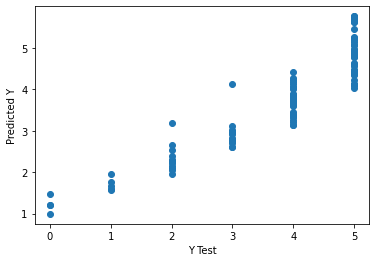

In [23]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Evaluasi Model

Evaluasi model dengan menggunakan library sklearn metrics untuk mengukur kualitas prediksi :
1. MAE(Mean Absolute Error) : MAE adalah skor linier yang berarti bahwa semua perbedaan individu diberi bobot yang sama rata-rata.
2. MSE(Mean Squared Error) : MSE pada dasarnya mengukur kesalahan kuadrat rata-rata dari prediksi.
3. RMSE(Root Mean Squared Error) : RMSE hanya akar kuadrat dari MSE, root kuadrat diperkenalkan untuk membuat skala kesalahan menjadi sama dengan skala target.

In [24]:
from sklearn import metrics#Library yang dipakai

print('MAE :', metrics.mean_absolute_error(y_test, predictions))
print('MSE :', metrics.mean_squared_error(y_test, predictions))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

print("Score Akurasi Train :", lm.score(X_train, y_train))
print("Score Akurasi Test :", lm.score(X_test, y_test))

MAE : 0.44856696913723737
MSE : 0.30990882651422624
RMSE : 0.5566945540547583
Score Akurasi Train : 0.8202804452202233
Score Akurasi Test : 0.8451694511819413


# Conclusion Data

In [25]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Height,-0.034111
Weight,0.033348


Conclusion Data dari Height memiliki nilai Koefesien -0.034111

Conclusion Data dari Weight memiliki nilai Koefesien -0.034111